# Loss Functions

    1.   *torch.nn.L1Loss                     - L1 Loss Function
    2.   *torch.nn.MSELoss                    - Mean Square Error Loss Function
    3.   *torch.nn.CrossEntropyLoss           - Cross entropy loss function
    4.   torch.nn.NLLLoss                    - Negative Log Likelihood loss function
    5.   torch.nn.PoissonNLLLoss             - Poisson Negative Log Likelihood loss function
    6.   torch.nn.nn.KLDivLoss               - Kullback Leiber Divergence loss function
    7.   *torch.nn.BCELoss                    - Binary cross entropy loss function
    8.   *torch.BCEWithLogitsLoss             - Binary cross entropy loss with logits function
    9.   torch.nn.MarginRankingLoss          - Margin ranking loss function
    10.  torch.nn.HingeEmbeddingLoss         - Hinge Embedding Loss function
    11.  torch.nn.MultiLabelMarginLoss       - Multi Label Margin loss function
    12.  torch.nn.SmoothL1Loss               - Smooth L1 Loss function
    13.  torch.nn.MultiLabelSoftMarginLoss   - Multi Label Soft Margin Loss function
    14.  torch.nn.CosineEmbeddingLoss        - Cosine Embedding loss function
    15.  torch.nn.MultiMarginLoss            - Multi Margin loss function
    16.  torch.nn.TripletMarginLoss          - Triplet Margin Loss Function

In [18]:
import os
import sys
import torch
import numpy as np
import torch.nn as nn
from torchvision import transforms, datasets
from PIL import Image
import cv2
import matplotlib.pyplot as plt
import torchvision

# FUNCTIONAL modules - Implementing each module as functions
import torch.nn.functional as F

## Cross-Entropy

<img src="img/cross_entropy.png" width="700">  

Cross Entropy Loss는 보통 Classification용으로 사용  
Linear Model (딥러닝 모델)을 통해서 최종값 (Logit 또는 스코어)이 나오고, `Softmax 함수를 통해 이 값들의 범위는 [0,1], 총 합은 1로 설정`.  
`최종 Loss는 One-hot Label (정답 라벨)과의 Cross Entropy`

<img src="img/cross_entropy_2.png" width="700">  

정답 클래스에 해당하는 스코어에 대해서만 로그합을 구하여 최종 Loss 계산

$$ \text{loss}(x, \text{class}) = -\log\left(\frac{\exp(x[\text{class}])}{\sum_j \exp(x[j])}\right) = -x[\text{class}] + \log\left(\sum_j \exp(x[j])\right) $$

In [20]:
[np.exp(1),np.exp(-2),np.exp(0)]

[2.718281828459045, 0.1353352832366127, 1.0]

In [33]:
np.exp(1)/(np.exp(1)+np.exp(-2)+np.exp(0))

0.7053845126982411

In [30]:
np.exp(-2)/(np.exp(1)+np.exp(-2)+np.exp(0))

1.1851223516044767

In [34]:
np.exp(0)/(np.exp(1)+np.exp(-2)+np.exp(0))

0.25949646034241913

In [25]:
-1*(1*np.log(0.705))+(0*np.log(0.305))+(0*np.log(0.259))

0.34955747616986843

In [32]:
-1*np.log(0.705)

0.34955747616986843

`Cross-Entropy Loss를 적용하기 위해서는 Softmax 필요하지만, PyTorch에서는 softmax와 cross-entropy를 합쳐서 계산 해주기 때문에 맨 마지막 layer가 softmax일 필요가 없음`

```Python
torch.nn.CrossEntropyLoss(weight=None, size_average=None, ignore_index=-100, reduce=None, reduction='mean')
```

Input tensor size는 일반적으로 (minibatch, Class), class의 range는 [0, C-1].  
Target의 shape은 (minibatch, ), target[i]의 range는 [0, C-1].

<img src="img/cross_entropy_loss.png" width="700">  <br>

<img src="img/cross_entropy_loss_2.png" width="700">  

`실제 코드 작성 방법`

```Python
import torch.nn as nn
criterion = nn.CrossEntropyLoss()
...
loss = criterion(input, target)
```

## Binary Cross Entropy Loss

`Class 가 2개인 binary case인 경우에는 BCELoss를 사용`

```python
torch.nn.BCELoss(weight=None, size_average=None, reduce=None, reduction='mean')
```

`BCELoss는 CrossEntropyLoss와 같이 softmax를 포함하지 않으므로,` softmax 또는 다른 activation function을 따로 적용!!  
Binary class이기 때문에 input과 target의 shape이 모두 (minibatch, )  
각 minibatch 마다 input 값의 range는 [0,1]이고, target 값은 0 또는 1.  


```Python
import torch.nn as nn
criterion = nn.BCELoss()
...
loss = criterion(nn.Sigmoid(input), target) # 또는 nn.Softmax(input)
```

$$\ell(x, y) = L = \{l_1,\dots,l_N\}^\top, \quad
l_n = - w_n \left[ y_n \cdot \log x_n + (1 - y_n) \cdot \log (1 - x_n) \right]$$

<img src = "img/BCELoss.png" width="900"> <br>
<img src = "img/BCELoss_calc.png" width="900">

In [11]:
print("Module Implementation")
loss = nn.BCELoss()
sigmoid = nn.Sigmoid()

output = torch.randn(5, requires_grad=True)
sigmoid_output = sigmoid(output) # CrossEntropy와 달리 sigmoid없으면 오류 발생
target_data = torch.empty(5).random_(2) # Binary Target

output_loss = loss(sigmoid_output, target_data)
output_loss.backward(retain_graph=True)    # loss.backward() computes dloss/dx for every parameter x which has requires_grad=True.

print("Input Data = ", output)
print("Target Data = ", target_data)
print("Output Loss = ", output_loss)
print("\n")

print("Functional implementation")
output_loss = F.binary_cross_entropy(sigmoid_output, target_data)
output_loss.backward()    # loss.backward() computes dloss/dx for every parameter x which has requires_grad=True.
print("Output Loss = ", output_loss)
print("\n")

print("Manual implementation")
output_loss = torch.mean( - ( target_data * torch.log(sigmoid_output) + (1 - target_data) * torch.log(1-sigmoid_output) ) )

print("Output Loss = ", output_loss)
print("\n")



Module Implementation
Input Data =  tensor([-0.7372, -0.4945, -0.1636, -0.1335,  0.7359], requires_grad=True)
Target Data =  tensor([0., 1., 1., 0., 1.])
Output Loss =  tensor(0.6320, grad_fn=<BinaryCrossEntropyBackward0>)


Functional implementation
Output Loss =  tensor(0.6320, grad_fn=<BinaryCrossEntropyBackward0>)


Manual implementation
Output Loss =  tensor(0.6320, grad_fn=<MeanBackward0>)




## BCEWithLogitsLoss

`BCELoss 앞에 Sigmoid layer 를 추가한 (Sigmoid + BCELoss). 따라서 sigmoid 나 softmax 불필요`

```python
torch.nn.BCEWithLogitsLoss(weight=None, size_average=None, reduce=None, reduction='mean', pos_weight=None)
```

만약 Sigmoid를 사용한다면, Sigmoide 와 BCELoss를 사용하는 것 보다는 BCEWithLogitsLoss를 사용하는 것이 더 안정적

$$\ell(x, y) = L = \{l_1,\dots,l_N\}^\top, \quad
l_n = - w_n \left[ t_n \cdot \log \sigma(x_n)
+ (1 - t_n) \cdot \log (1 - \sigma(x_n)) \right]$$

In [18]:
print("Module implementation")
loss = nn.BCEWithLogitsLoss()
sigmoid = nn.Sigmoid()

input_data = torch.randn(5, requires_grad=True)
sigmoid_input_data = sigmoid(input_data) 

target_data = torch.empty(5).random_(2) # Binary Target

output_loss = loss(sigmoid_input_data, target_data)
output_loss.backward(retain_graph=True)    # loss.backward() computes dloss/dx for every parameter x which has requires_grad=True.

print("Input Data = ", input_data)
print("\n")
print("Target Data = ", target_data)
print("\n")
print("Output Loss = ", output_loss)
print("\n")

print("Functional implementation")
output_loss = F.binary_cross_entropy_with_logits(sigmoid_input_data, target_data)
output_loss.backward()    # loss.backward() computes dloss/dx for every parameter x which has requires_grad=True.
print("Output Loss = ", output_loss)

Module implementation
Input Data =  tensor([ 0.6399, -1.0481,  0.2680, -1.1035, -0.3882], requires_grad=True)


Target Data =  tensor([0., 1., 1., 0., 1.])


Output Loss =  tensor(0.6862, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)


Functional implementation
Output Loss =  tensor(0.6862, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)


## L1 loss Function


`nn.L1Loss`: Creates a criterion that measures the mean absolute value of the element-wise difference between input x and target y
    
$$\ell(x, y) = L = \{l_1,\dots,l_N\}^\top, \quad
l_n = \left| x_n - y_n \right|$$

In [19]:
print("Module implementation")
loss = nn.L1Loss()
input_data = torch.randn(10, requires_grad=True)
target_data = torch.randn(10)
output_loss = loss(input_data, target_data)
output_loss.backward()    # loss.backward() computes dloss/dx for every parameter x which has requires_grad=True.

print("Input Data = ", input_data)
print("Output Loss = ", output_loss)
print("\n")

print("Functional implementation")
output_loss = F.l1_loss(input_data, target_data, reduction='elementwise_mean')
output_loss.backward()    # loss.backward() computes dloss/dx for every parameter x which has requires_grad=True.
print("Output Loss = ", output_loss)

Module implementation
Input Data =  tensor([ 0.2909,  0.1518, -0.6119,  0.5733, -2.5542,  0.3013, -0.7613, -0.8967,
         0.0834,  1.0762], requires_grad=True)
Output Loss =  tensor(1.2719, grad_fn=<L1LossBackward0>)


Functional implementation
Output Loss =  tensor(1.2719, grad_fn=<L1LossBackward0>)


## Mean Square Error

Mean Squared Error (MSE) 는 딥러닝에서 가장 많이 사용하는 loss.Output은 예측값, target은 정답값.

$\begin{align}
{1 \over n}\sum_{i=1}^n(\text{output}_i - \text{target}_i)^2
\end{align}$


```python
torch.nn.MSELoss(size_average=None, reduce=None, reduction='mean')
```

여기서 input과 target의 shape은 (minibatch, …)으로 동일. 이미지 간의 mse loss를 구한다면, (minibatch, h, w, channel) 이 됨.

<img src="img/mse_loss.png" width="900">


```python
import torch.nn as nn
criterion = nn.MSELoss()
...
loss = criterion(input, target)
```

In [20]:
print("Module implementation")
loss = nn.MSELoss()
input_data = torch.randn(10, requires_grad=True)
target_data = torch.randn(10)
output_loss = loss(input_data, target_data)
output_loss.backward()    # loss.backward() computes dloss/dx for every parameter x which has requires_grad=True.

print("Input Data = ", input_data)
print("Output Loss = ", output_loss)
print("\n")

print("Functional implementation")
output_loss = F.mse_loss(input_data, target_data, reduction='elementwise_mean')
output_loss.backward()    # loss.backward() computes dloss/dx for every parameter x which has requires_grad=True.
print("Output Loss = ", output_loss)

Module implementation
Input Data =  tensor([ 0.5403,  0.6665,  1.2667, -0.6150, -0.5709,  1.1037, -0.8704,  1.4374,
         0.0727, -0.6800], requires_grad=True)
Output Loss =  tensor(1.5247, grad_fn=<MseLossBackward0>)


Functional implementation
Output Loss =  tensor(1.5247, grad_fn=<MseLossBackward0>)


# Cross Entropy vs MSE

`Cross entorpy is better than MSE for classification, even though MSE can work!!`


<img src="img/loss_case_1.png" width=720> <img src="img/loss_case_2.png" width=700>

### Method 1) Target is given in onehot

In [13]:
import torch
import torch.nn as nn

#Case 1
output_1 = torch.tensor([[0.3, 0.3, 0.4],[0.3, 0.4, 0.3],[0.1, 0.2, 0.7]], dtype = torch.float32)
label_1 = torch.tensor([[0,0,1],[0,1,0],[1,0,0]], dtype = torch.float32) # or torch.tensor([2,1,0]
loss_1_ce = torch.mean( torch.sum(-torch.log(output_1) * label_1, dim = 1 ) )
loss_1_mse = torch.mean( torch.sum( (output_1 - label_1)**2, dim=1) )
print(f"Case 1-  [CE:]{loss_1_ce:.2f}, [MSE:]{loss_1_mse:.2f}")
print(-torch.log(output_1)*label_1)
print((output_1 - label_1)**2)
#Case 2
output_2 = torch.tensor([[0.1, 0.2, 0.7],[0.1, 0.7, 0.2],[0.3, 0.4, 0.3]], dtype = torch.float32)
label_2 = torch.tensor([[0,0,1],[0,1,0],[1,0,0]], dtype = torch.float32) # or torch.tensor([2,1,0]
loss_2_ce = torch.mean( torch.sum(-torch.log(output_2) * label_2, dim = 1 ) )
loss_2_mse = torch.mean( torch.sum( (output_2 - label_2)**2, dim=1) )
print(f"Case 2-  [CE:]{loss_2_ce:.2f}, [MSE:]{loss_2_mse:.2f}")
print(-torch.log(output_2)*label_2)
print((output_2 - label_2)**2)


Case 1-  [CE:]1.38, [MSE:]0.81
tensor([[0.0000, 0.0000, 0.9163],
        [0.0000, 0.9163, 0.0000],
        [2.3026, 0.0000, 0.0000]])
tensor([[0.0900, 0.0900, 0.3600],
        [0.0900, 0.3600, 0.0900],
        [0.8100, 0.0400, 0.4900]])
Case 2-  [CE:]0.64, [MSE:]0.34
tensor([[0.0000, 0.0000, 0.3567],
        [0.0000, 0.3567, 0.0000],
        [1.2040, 0.0000, 0.0000]])
tensor([[0.0100, 0.0400, 0.0900],
        [0.0100, 0.0900, 0.0400],
        [0.4900, 0.1600, 0.0900]])


### Method 2) Target is given in labels

In [3]:
import torch
import torch.nn as nn

#Case 1
output_1 = torch.tensor([[0.3, 0.3, 0.4],[0.3, 0.4, 0.3],[0.1, 0.2, 0.7]], dtype = torch.float32)
label_1 = torch.tensor([2, 1, 0]).reshape(3,1)
loss_1_ce = torch.mean( -torch.log(torch.gather(output_1, 1, label_1) ) )
loss_1_mse = torch.mean( torch.sum( (output_1 - label_1)**2, dim=1) )
print(f"Case 1-  [CE:]{loss_1_ce:.2f}, [MSE:]{loss_1_mse:.2f}")
print(-torch.log(output_1)*label_1)
print((output_1 - label_1)**2)
#Case 2
output_2 = torch.tensor([[0.1, 0.2, 0.7],[0.1, 0.7, 0.2],[0.3, 0.4, 0.3]], dtype = torch.float32)
label_2 = torch.tensor([2, 1, 0]).reshape(3,1)
loss_2_ce = torch.mean( -torch.log(torch.gather(output_2, 1, label_2) ) )
loss_2_mse = torch.mean( torch.sum( (output_2 - label_2)**2, dim=1) )
print(f"Case 2-  [CE:]{loss_2_ce:.2f}, [MSE:]{loss_2_mse:.2f}")
print(-torch.log(output_2)*label_2)
print((output_2 - label_2)**2)


Case 1-  [CE:]1.38, [MSE:]3.41
tensor([[2.4079, 2.4079, 1.8326],
        [1.2040, 0.9163, 1.2040],
        [0.0000, 0.0000, 0.0000]])
tensor([[2.8900, 2.8900, 2.5600],
        [0.4900, 0.3600, 0.4900],
        [0.0100, 0.0400, 0.4900]])
Case 2-  [CE:]0.64, [MSE:]3.47
tensor([[4.6052, 3.2189, 0.7133],
        [2.3026, 0.3567, 1.6094],
        [0.0000, 0.0000, 0.0000]])
tensor([[3.6100, 3.2400, 1.6900],
        [0.8100, 0.0900, 0.6400],
        [0.0900, 0.1600, 0.0900]])


`MSE can impose much higher loss (penaly) for wrong answers!`  
`The lowwer the probability corresponding to the correct answer, the higher the penalty`



C:\Users\user\AppData\Local\Temp\ipykernel_9320\3319023339.py:5: RuntimeWarning: divide by zero encountered in log
  ce = -np.log(output)


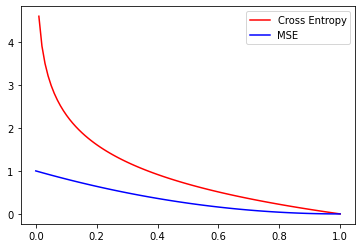

In [28]:
import matplotlib.pyplot as plt
import numpy as np

output = np.linspace(0, 1, 100) #
ce = -np.log(output)
mse = (output-1)**2 # the squared error between output and correct answer

plt.plot(output, ce, 'r-', label='Cross Entropy')
plt.plot(output, mse, 'b-', label='MSE')
plt.legend()
plt.show()


# `Lab 1.` We have three clasess (`dog, cat, and panda`). For given input data, train the following netwok to yield the output corresponding to `cat`.

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

input_size = 10
num_classes = 3

x = torch.randn(1, input_size)
model = nn.Linear(~~~

# `Lab 2.` We have three clasess (`dog, cat, and panda`). For given input data, train the following netwok to yield the output pointing both `dog and cat`.

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

input_size = 10
num_classes = 3

x = torch.randn(1, input_size)
model = nn.Linear( ~~~)